## \section{Ewolucja grupy dla $T\rightarrow 0$}

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})
from society import Society
import numpy as np
import math
from matplotlib.animation import FuncAnimation, FFMpegWriter
from IPython.display import HTML
from tqdm import tqdm

plt.rcParams["hist.bins"] = 30
num_of_agents = 10**4
time = num_of_agents * 10000
num_frames = 50

Tim = np.linspace(0, time, num_frames)

miu_0 = 10
sig_0 = 2
temperature = 0
thresh = -10000

dist_data = []
means = []
stddevs = []
entropies = []
entropies2 = []

society = Society(temperature=temperature, thresh=thresh, crea_mean=miu_0, crea_stddev=sig_0, num_of_agents=num_of_agents)
for t in tqdm(Tim):
    society.run_until_time(t)
    dist = np.array([agent.creativity for agent in society.agents])
    means.append(np.average(dist))
    stddevs.append(np.std(dist))

fig, ax = plt.subplots(facecolor='white', figsize=(15,6))
ax.plot(Tim, entropies, 'ok--', label=f'σ(t=0) = 2')
ax.plot(Tim, entropies2, '^r:', label=f'σ(t=0) = 20')
ax.grid()
Y = np.sqrt(stddevs[0]**2 + 2*Tim/num_of_agents)
ax.plot(Tim, Y, 'k-', label='Dane teoretyczne')
ax.set_xlabel("Ilość kroków")
ax.set_ylabel("Odchylenie standardowe σ(t)")
ax.legend()

100%|██████████| 80/80 [01:07<00:00,  1.19it/s]


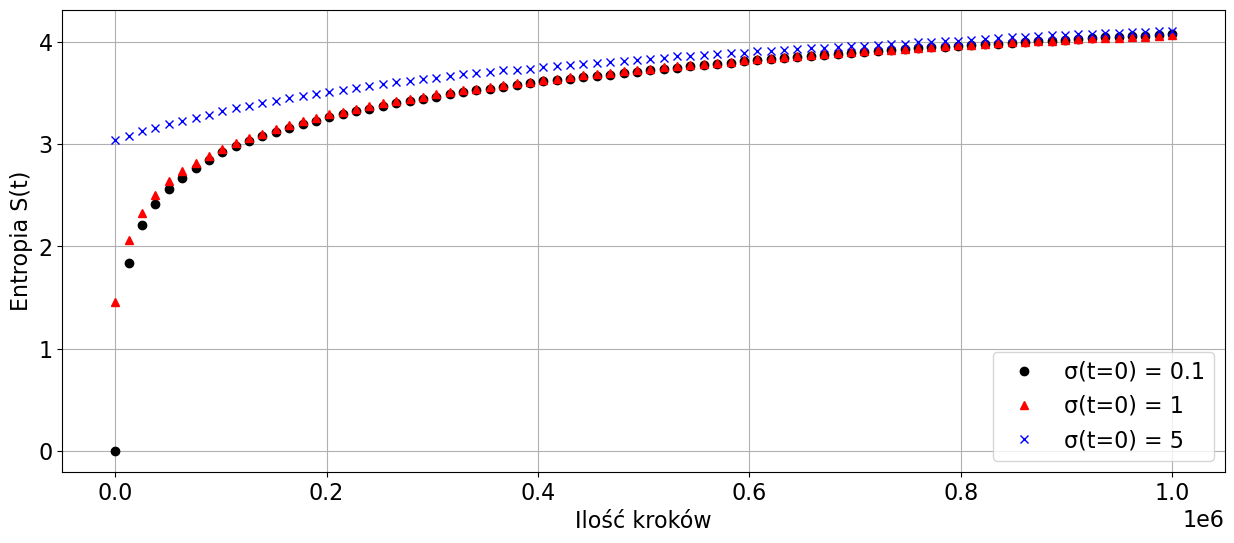

In [11]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})
from society import Society
import numpy as np
import math
from matplotlib.animation import FuncAnimation, FFMpegWriter
from IPython.display import HTML
from tqdm import tqdm

plt.rcParams["hist.bins"] = 30
num_of_agents = 10**4
time = num_of_agents * 100
num_frames = 80

Tim = np.linspace(0, time, num_frames)

miu_0 = 100
sig_0 = 0.1
temperature = 0
thresh = -10000

entropies = []
entropies2 = []
entropies3 = []

society = Society(temperature=temperature, thresh=thresh, crea_mean=miu_0, crea_stddev=sig_0, num_of_agents=num_of_agents)
society2 = Society(temperature=temperature, thresh=thresh, crea_mean=miu_0, crea_stddev=1, num_of_agents=num_of_agents)
society3 = Society(temperature=temperature, thresh=thresh, crea_mean=miu_0, crea_stddev=5, num_of_agents=num_of_agents)

for t in tqdm(Tim):
    society.run_until_time(t)
    society2.run_until_time(t)
    society3.run_until_time(t)

    entropies.append(society.get_entropy())
    entropies2.append(society2.get_entropy())
    entropies3.append(society3.get_entropy())


fig, ax = plt.subplots(facecolor='white', figsize=(15,6))
ax.plot(Tim, entropies, 'ok', label=f'σ(t=0) = 0.1')
ax.plot(Tim, entropies2, '^r', label=f'σ(t=0) = 1')
ax.plot(Tim, entropies3, 'xb', label=f'σ(t=0) = 5')
ax.grid()
ax.set_xlabel("Ilość kroków")
ax.set_ylabel("Entropia S(t)")
ax.legend()

## \section{Ewolucja grupy dla $T\rightarrow +\infty$}

100%|██████████| 40/40 [02:11<00:00,  3.28s/it]


10.0642


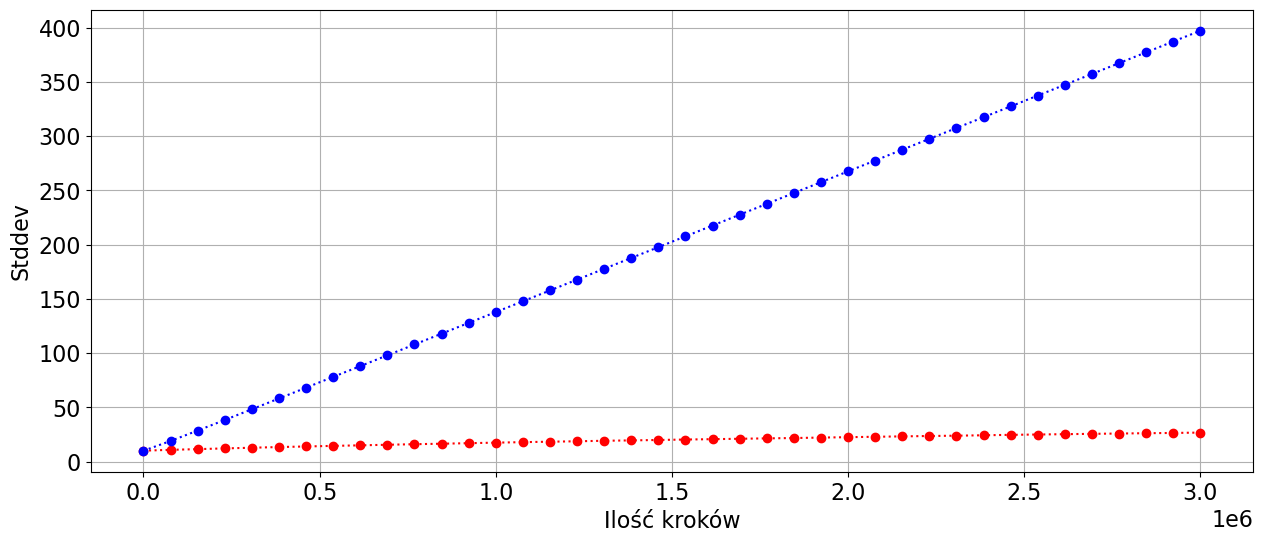

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})
from society import Society
import numpy as np
import math
from matplotlib.animation import FuncAnimation, FFMpegWriter
from IPython.display import HTML
from tqdm import tqdm

plt.rcParams["hist.bins"] = 30
num_of_agents = 10**4
time = num_of_agents * 300
num_frames = 40

Tim = np.linspace(0, time, num_frames)

miu_0 = 10
sig_0 = 10
temperature = 'infty'
thresh = 9**4

stddevs, stddevs2 = [], []

society = Society(temperature=temperature, thresh=thresh, crea_mean=miu_0, crea_stddev=sig_0, num_of_agents=num_of_agents)
society2 = Society(temperature=0, thresh=thresh, crea_mean=miu_0, crea_stddev=sig_0, num_of_agents=num_of_agents)
for t in tqdm(Tim):
    society.run_until_time(t)
    society2.run_until_time(t)
    # dist = np.array([agent.creativity for agent in society.agents])
    # dist2 = np.array([agent.creativity for agent in society2.agents])
    stddevs.append(society.get_entropy())
    stddevs2.append(society2.get_entropy())


fig, ax = plt.subplots(facecolor='white', figsize=(15,6))
ax.plot(Tim, stddevs, 'or:')
ax.plot(Tim, stddevs2, 'ob:')
ax.grid()
ax.set_xlabel("Ilość kroków")
ax.set_ylabel("Stddev")
# print(society.get_crea_mean())

 20%|██        | 1/5 [04:26<17:46, 266.69s/it]c:\Users\cp\ProgrammingProjects\Jupyter\group_creativity\society.py:185: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x/T))
100%|██████████| 5/5 [19:52<00:00, 238.55s/it]


ValueError: Unknown format code 'E' for object of type 'str'

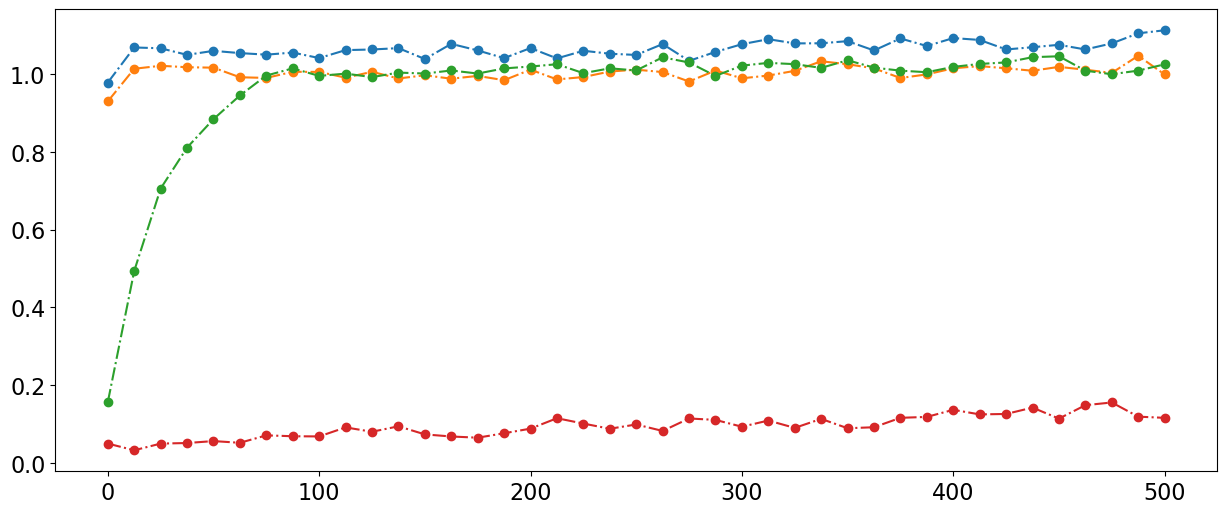

In [2]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})
from society import Society
import numpy as np
import math
from matplotlib.animation import FuncAnimation, FFMpegWriter
from IPython.display import HTML
from tqdm import tqdm

plt.rcParams["hist.bins"] = 30
num_of_agents = 10**3
time = num_of_agents * 80

T_res, Tim_res = 5, 41

Tim = np.linspace(0, 500, Tim_res)
T = [0, 10**2, 10**4, 10**8, 'infty']

miu_0 = 10
sig_0 = 10
thresh = 10000

entropies = np.zeros((T_res, Tim_res))

for i, temp in enumerate(tqdm(T)):
    society = Society(crea_mean=miu_0, crea_stddev=sig_0, temperature=temp, thresh=thresh, num_of_agents=num_of_agents)

    for j, t in enumerate(Tim*num_of_agents):
        society.run_until_time(t)
        entropies[i, j] = society.get_entropy_production()
    
fig, ax = plt.subplots(facecolor='white', figsize=(15,6))
for i, temp in enumerate(T):
    plt.plot(Tim, entropies[i,:], 'o-.', label=f'Temperature = {temp}')
ax.grid()
ax.set_xlabel("Ilość kroków")
ax.set_ylabel("Entropia S(t)")
ax.legend()

In [ ]:
from society import Society
import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, FFMpegWriter
from IPython.display import HTML
import itertools
from tqdm import tqdm

plt.rcParams["hist.bins"] = 30
bins = list(range(-30,60))
num_of_agents = 10**5
time = num_of_agents * 12
num_frames = 2
miu_0 = 10
sig_0 = 10
thresh = 10**4

dist_data = []
dist_data2 = []
times = []

society = Society(temperature=0, thresh=thresh, crea_mean=miu_0, crea_stddev=sig_0, num_of_agents=num_of_agents)
society2 = Society(temperature=10**8, thresh=thresh, crea_mean=miu_0, crea_stddev=sig_0, num_of_agents=num_of_agents)
for t in tqdm(range(time)):
    society.next_step()
    society2.next_step()
    if t % (time // num_frames) == 0:
        times.append(t)
        dist_data.append(np.array([x.creativity for x in society.agents]))
        dist_data2.append(np.array([x.creativity for x in society2.agents]))

plot_range=(-30,60)

fig, ax = plt.subplots(ncols=1, nrows=2, facecolor='white', figsize=(20,10))
ax[0].hist(dist_data[0][:], bins=bins, density=True, color = 'black')
ax[0].set_xlim(plot_range)
ax[1].hist(dist_data2[0][:], bins=bins, density=True, color= 'black')
ax[1].set_xlim(plot_range)


def update(step):
    ax[0].clear()
    ax[1].clear()

    ax[0].hist(dist_data[step][:], density=True, bins = bins, color = 'black', label=f"T = {society.temperature}")
    ax[1].hist(dist_data2[step][:], density=True, bins = bins, color='black', label=f"T = {society2.temperature:.2e}")

    for axe in ax:
        axe.set_ylabel("Gęstość agentów")
        axe.set_xlabel("Kreatywność")
        axe.set_xlim(plot_range)
        axe.set_ylim(0,0.1)
        axe.legend()
        axe.grid()

plt.close(fig)

ani = FuncAnimation(fig, update, frames=num_frames, repeat=False)
# writervideo = FFMpegWriter(fps=60)
# ani.save('C:/Users/cp/ProgrammingProjects/Jupyter/group_creativity/tlowthigh_evolution.mp4', writer=writervideo)
HTML(ani.to_jshtml())

        

100%|██████████| 1200000/1200000 [00:39<00:00, 30146.79it/s]


100%|██████████| 11/11 [1:03:38<00:00, 347.17s/it]


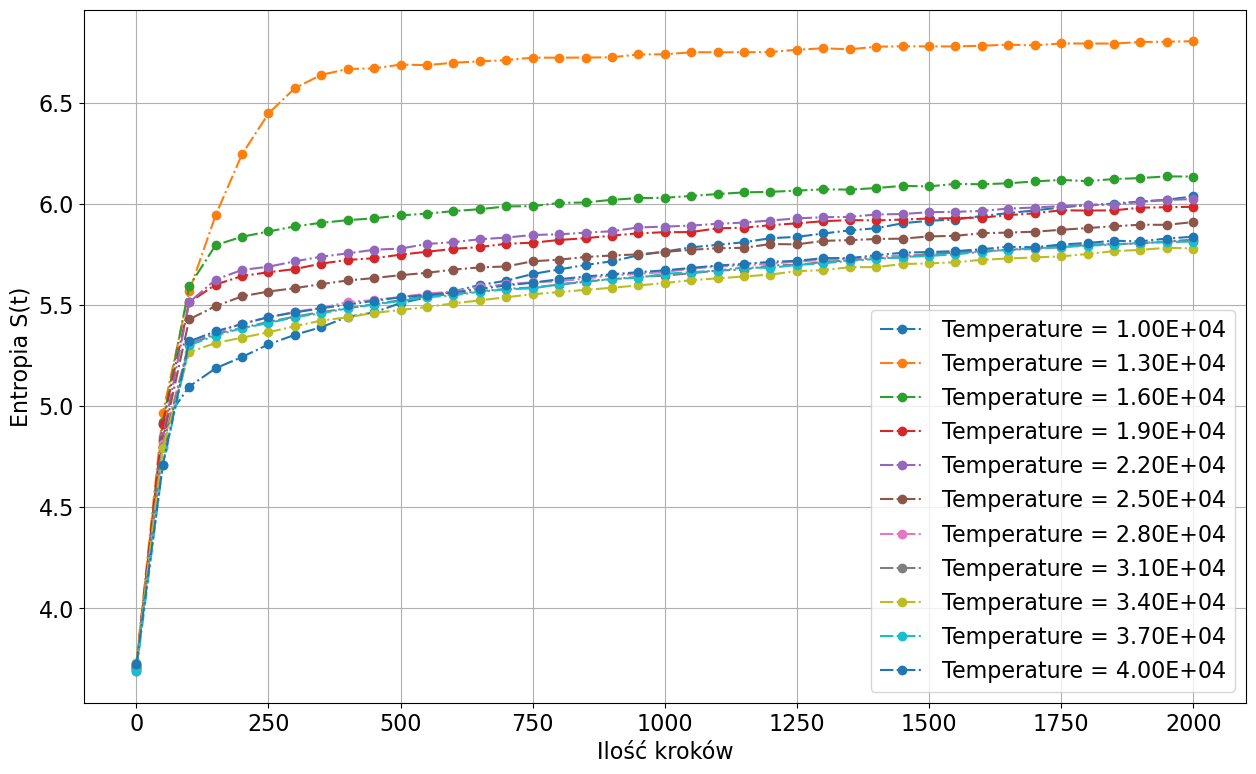

In [12]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})
from society import Society
import numpy as np
import math
from matplotlib.animation import FuncAnimation, FFMpegWriter
from IPython.display import HTML
from tqdm import tqdm

plt.rcParams["hist.bins"] = 30
num_of_agents = 5*10**3
time = num_of_agents * 80

T_res, Tim_res = 11, 41

Tim = np.linspace(0, 2000, Tim_res)
T = np.linspace(1*10**4, 4*10**4, T_res)

miu_0 = 10
sig_0 = 10
thresh = 10000

entropies = np.zeros((T_res, Tim_res))

for i, temp in enumerate(tqdm(T)):
    society = Society(crea_mean=miu_0, crea_stddev=sig_0, temperature=temp, thresh=thresh, num_of_agents=num_of_agents)

    for j, t in enumerate(Tim*num_of_agents):
        society.run_until_time(t)
        entropies[i, j] = society.get_entropy()
    


fig, ax = plt.subplots(facecolor='white', figsize=(15,9))
for i, temp in enumerate(T):
    plt.plot(Tim, entropies[i,:], 'o-.', label=f'Temperature = {temp:.2E}')
ax.grid()
ax.set_xlabel("Ilość kroków")
ax.set_ylabel("Entropia S(t)")
ax.legend()

## \section{master equation}

100%|██████████| 51/51 [00:16<00:00,  3.12it/s]


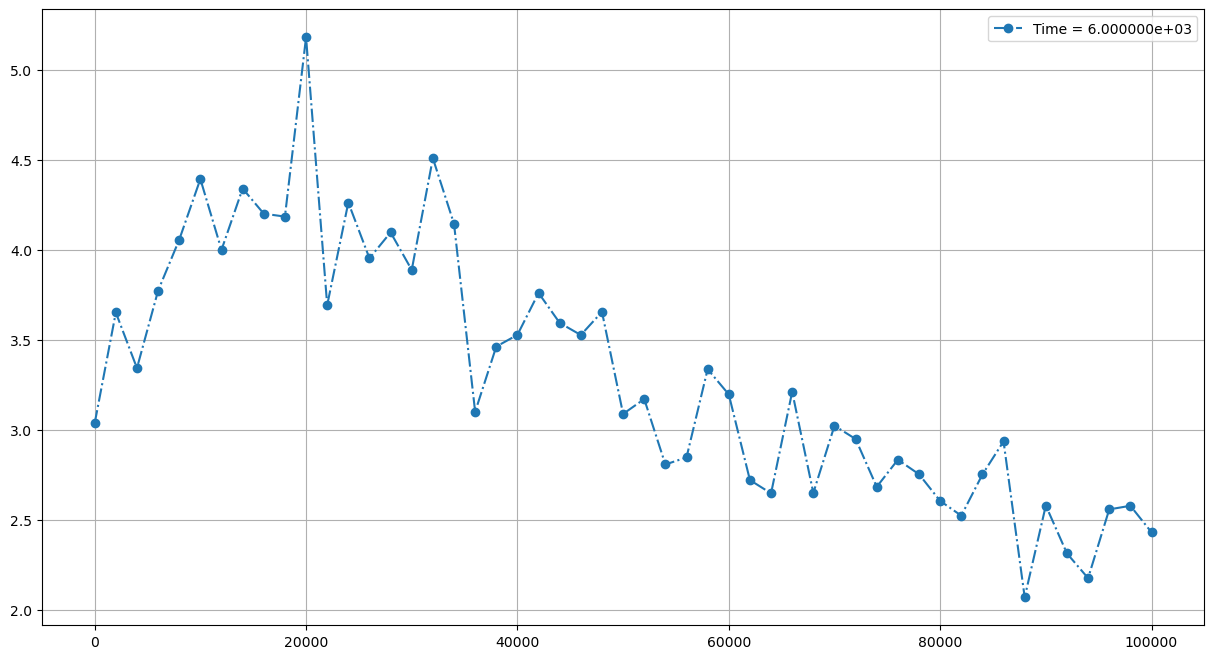

In [6]:
from society import Society
from tqdm import tqdm
import matplotlib.pyplot as plt 
import numpy as np


num_of_agents = 10**2
miu_0 = 10
sig_0 = 10
thresh = 10**4

T_res, time_res, average = 51, 1, 5

# Tim = [num_of_agents*10, num_of_agents*40, num_of_agents*70, num_of_agents*100, num_of_agents*130]
Tim = [num_of_agents*60]
T = np.linspace(0, 10**5, T_res)

prods = np.zeros((time_res, T_res, average))
# society = Society(crea_mean=miu_0, crea_stddev=sig_0, temperature=T[0], thresh=thresh, num_of_agents=num_of_agents)
for k in range(average):
    for j, temp in enumerate(tqdm(T)):
        society = Society(crea_mean=miu_0, crea_stddev=sig_0, temperature=temp, thresh=thresh, num_of_agents=num_of_agents)
        for i, t in enumerate(Tim):
            society.run_until_time(t)
            prods[i, j, k] = society.get_entropy_production()
prods = np.average(prods, axis=2)

fig, ax = plt.subplots(figsize=(15,8))
for i, prod in enumerate(prods):
    ax.plot(T, prod, 'o-.', label=f'Time = {Tim[i]:e}')
# ax2 = ax.twinx()
# ax2.plot(T, slopes, 'mx-')
ax.grid()
ax.legend()
 

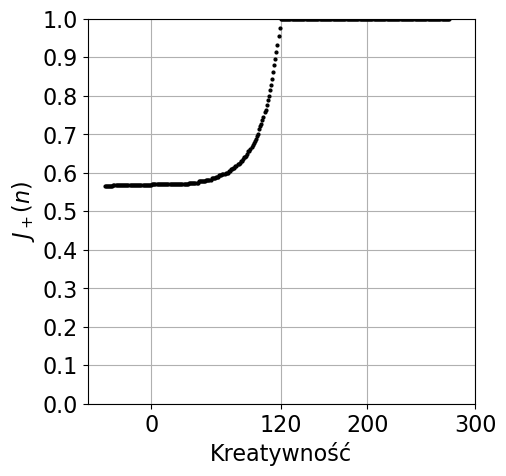

In [30]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})
from society import Society
import numpy as np
import math
from matplotlib.animation import FuncAnimation, FFMpegWriter
from IPython.display import HTML
from tqdm import tqdm
import itertools
from matplotlib import cm

num_of_agents = 10**4
miu_0 = 100
sig_0 = 30
thresh = 120**3


society = Society(crea_mean=miu_0, crea_stddev=sig_0, temperature=0, thresh=thresh, num_of_agents=num_of_agents)
society.run_until_time(num_of_agents*30)
creas = np.array([agent.creativity for agent in society.agents])
min, max = int(np.min(creas)), int(np.max(creas))
gammas = np.zeros(max-min+1)
for i in range(max - min + 1):
    gammas[i] = society.agent_success_chance(min + i)

# for i, chance in enumerate(gammas):
#             if chance >= 0.5:
#                 split = min + i
#                 break

# mass_frac = len([_ for agent in society.agents if agent.creativity >= split]) / num_of_agents
# print(f'{mass_frac:.2f}')

fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(list(range(min,max+1)), gammas, 'ok', markersize=2)
ax.set_ylim(0,1)
ax.set_ylabel("$J_+(n)$")
ax.set_xlabel('Kreatywność')
ax.set_xticks([0, 120, 200, 300])
ax.set_yticks(np.linspace(0,1,11))
ax.grid()

# bins = list(range(min, max+1))
# pair_creativity = np.array([creas[[pair[0], pair[1]]] for pair in itertools.combinations(np.arange(num_of_agents), 2)])
# ax.hist2d(pair_creativity[:, 0], pair_creativity[:,1], cmap='Greys', bins = (bins, bins), density=True)
# X = bins
# X2 = np.linspace(0.1, 300, 100)
# ax.plot(X, np.cbrt(np.subtract(thresh, np.power(X,3))), 'k--', label=f'$x^3 + y^3 - 130^3 = 0$')
# ax.plot(X, np.cbrt(np.subtract((temperature*math.log(2-1.73)+thresh), np.power(X,3))), 'k--')
# ax.plot(X, np.cbrt(np.subtract((temperature*math.log(2+1.73)+thresh), np.power(X,3))), 'k--')
# ax.plot(X, np.subtract(thresh, X), 'k-.', label=f'$x + y - 200 = 0$')
# ax.plot(X1, np.divide(thresh, X1), 'k-.', label=f'$xy - 120^2 = 0$')
# ax.plot(X2, np.divide(thresh, X2), 'k-.')
# ax.grid()
# ax.set_aspect('equal')
# ax.set_xlabel("Kreatywność")
# ax.set_ylabel("Kreatywność")
# ax.legend()

100%|██████████| 1/1 [07:32<00:00, 452.44s/it]


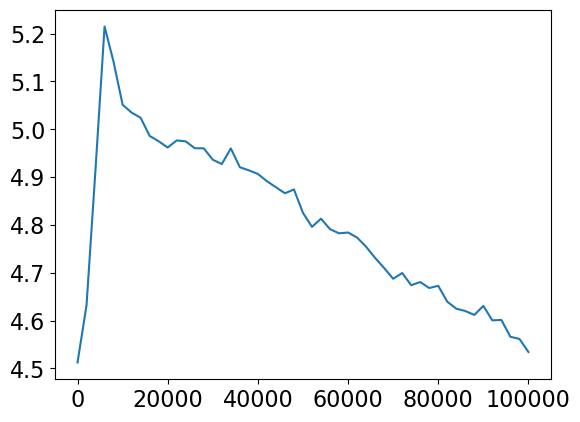

In [17]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})
from society import Society
import numpy as np
import math
from matplotlib.animation import FuncAnimation, FFMpegWriter
from IPython.display import HTML
from tqdm import tqdm
import itertools
from matplotlib import cm

num_of_agents = 5*10**3
miu_0 = 10

thresh = 9**4
time = num_of_agents*60

sig_res, t_res = 1, 51

T = np.linspace(1, 10**5, t_res)
Sig = np.linspace(10, 40, sig_res)
entropies = np.zeros((sig_res, t_res))

for i, s in enumerate(tqdm(Sig)):
    for j, temp in enumerate(T):
        society = Society(crea_mean=miu_0, crea_stddev=s, temperature=temp, thresh=thresh, num_of_agents=num_of_agents)
        society.run_until_time(time)
        entropies[i, j] = society.get_entropy()

for ent in entropies:
    plt.plot(T, ent)
    # 13000

  0%|          | 0/51 [00:00<?, ?it/s]

100%|██████████| 51/51 [2:41:12<00:00, 189.65s/it]  


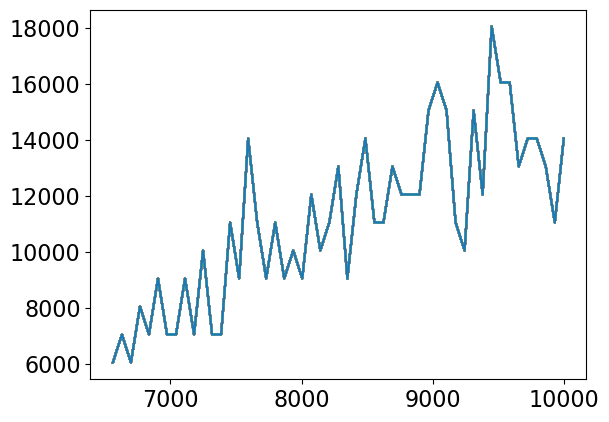

In [27]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})
from society import Society
import numpy as np
import math
from matplotlib.animation import FuncAnimation, FFMpegWriter
from IPython.display import HTML
from tqdm import tqdm
import itertools
from matplotlib import cm

num_of_agents = 10**3
miu_0 = 10
sig_0 = 10

time = num_of_agents*60

k_res, t_res = 51, 101

T = np.linspace(5*10**1, 10**5, t_res)
K = np.linspace(9**4, 10**4, k_res)
entropies = np.zeros((k_res, t_res))

for i, k in enumerate(tqdm(K)):
    for j, temp in enumerate(T):
        society = Society(crea_mean=miu_0, crea_stddev=sig_0, temperature=temp, thresh=k, num_of_agents=num_of_agents)
        society.run_until_time(time)
        entropies[i, j] = society.get_entropy()



for i, ent in enumerate(entropies):
    plt.plot(K, T[np.argmax(entropies, axis=1)])



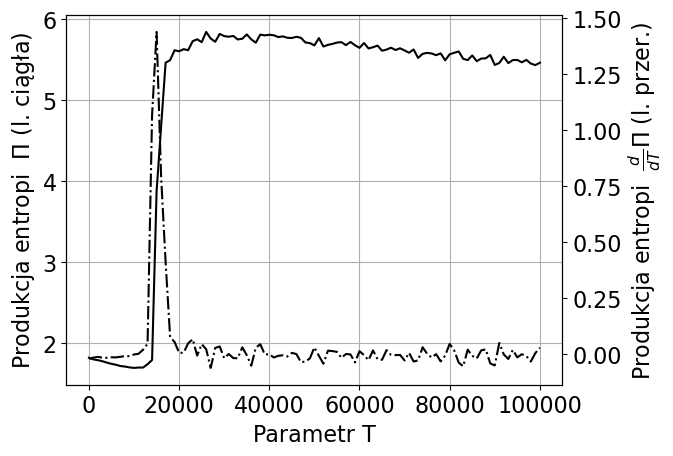

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})

with open("data_Pi/t60.txt", "r") as file, open('data_Pi/t80.txt', 'r') as file2, open('data_Pi/t100.txt', 'r') as file3 \
, open('data_Pi/t120.txt', 'r') as file4, open('data_Pi/t150.txt', 'r') as file5, open('data_Pi/t200_new.txt', 'r') as file6:
    # Read lines from the file
    lines = file.readlines()
    lines2 = file2.readlines()
    lines3 = file3.readlines()
    lines4 = file4.readlines()
    lines5 = file5.readlines()
    lines6 = file6.readlines()

# Initialize empty lists to store the vectors

T, P, P2, P3, P4, P5, P6 = [], [], [], [], [], [], []

# Parse the lines and populate the vectors
for line in lines:
    values = line.split()
    T.append(float(values[0]))
    P.append(float(values[1]))

for line in lines2:
    values = line.split()
    P2.append(float(values[1]))

for line in lines3:
    values = line.split()
    P3.append(float(values[1]))

for line in lines4:
    values = line.split()
    P4.append(float(values[1]))

for line in lines5:
    values = line.split()
    P5.append(float(values[1]))

for line in lines6:
    values = line.split()
    P6.append(float(values[1]))

# plt.plot(T, P, label = '60N')
# plt.plot(T, P2, label = '80N')
# plt.plot(T, P3, 'k:', label = 't = 100N')
# plt.plot(T, P4, label = '120N')
# plt.plot(T, P5, 'k--', label = 't = 150N')
fig, ax = plt.subplots()
ax.plot(T, P6, 'k-', label=r'$\Pi')
ax2 = ax.twinx()
ax2.plot(T, np.gradient(P6), 'k-.', label=r'$\frac{d}{dT}\Pi')

ax.set_xlabel('Parametr T')
ax.set_ylabel(r'Produkcja entropi  $\Pi$ (l. ciągła)')
ax2.set_ylabel(r'Produkcja entropi  $\frac{d}{dT}\Pi$ (l. przer.)')

ax.grid()
